In [38]:
import obspy
import glob
import os, sys
import numpy as np
from obspy import read, read_inventory
import obspy.signal
import matplotlib.pyplot as plt
import scipy.signal as signal

import warnings
warnings.filterwarnings('ignore')
# latex parameter
font = {
    'family': 'serif', 
    'serif': ['Computer Modern Roman'],
    'weight' : 'regular',
    'size'   : 14
    }

plt.rc('font', **font)
plt.rc('text', usetex=True)
# plt.style.use('classic')

color_map = 'viridis'

In [3]:
earthquakes = read('./seismogram_v2/earthquakes/*.SAC')
explosions = read('./seismogram_v2/explosions/*.SAC')

/usr/local/lib/python3.6/site-packages/obspy/core/trace.py:187: UserWarning: Calibration factor set to 0.0!
  warnings.warn(msg, UserWarning)


In [4]:
print('Number of earthquakes: {}'.format(len(earthquakes)))
print('Number of Explosions: {}'.format(len(explosions)))

Number of earthquakes: 12962
Number of Explosions: 10498


In [5]:
eqntrk = []
exntrk = []
for i in range(len(earthquakes)):
    eqntrk.append(earthquakes[i].stats.network)

for i in range(len(explosions)):
    exntrk.append(explosions[i].stats.network)
    

In [34]:
print(np.unique(eqntrk))

['AE' 'AK' 'AT' 'AV' 'AZ' 'BK' 'CC' 'CI' 'CM' 'CN' 'CU' 'DK' 'DR' 'EP' 'G'
 'GE' 'GS' 'HW' 'II' 'IM' 'IU' 'IW' 'KP' 'LB' 'LD' 'LI' 'MB' 'MX' 'N4' 'NE'
 'NM' 'NN' 'NO' 'NR' 'NU' 'OK' 'OO' 'PE' 'PM' 'PN' 'PO' 'PR' 'PY' 'RV' 'SC'
 'SS' 'SV' 'TA' 'TS' 'UO' 'US' 'UU' 'UW' 'VE' 'WC' 'WI' 'X1' 'X5' 'X9' 'XK'
 'XL' 'XN' 'XQ' 'XR' 'XU' 'XV' 'XZ' 'Y5' 'YH' 'YN' 'YO' 'YW' 'Z4' 'ZC']


In [35]:
print(np.unique(exntrk))

['AE' 'AK' 'AT' 'AV' 'AZ' 'BK' 'CC' 'CI' 'CM' 'CN' 'CU' 'DK' 'DR' 'G' 'GE'
 'GS' 'II' 'IM' 'IU' 'IW' 'LB' 'LD' 'MB' 'MC' 'MX' 'N4' 'NA' 'NE' 'NM' 'NU'
 'OK' 'OO' 'PB' 'PE' 'PN' 'PR' 'PY' 'RV' 'SC' 'SV' 'TA' 'TR' 'TS' 'UO' 'US'
 'UU' 'UW' 'VE' 'WC' 'WI' 'X4' 'X8' 'XD' 'XI' 'XO' 'XQ' 'XT' 'XW' 'XY' 'YE'
 'YN' 'YZ' 'Z9' 'ZC']


In [36]:
net = exntrk + eqntrk
print(np.unique(net))

['AE' 'AK' 'AT' 'AV' 'AZ' 'BK' 'CC' 'CI' 'CM' 'CN' 'CU' 'DK' 'DR' 'EP' 'G'
 'GE' 'GS' 'HW' 'II' 'IM' 'IU' 'IW' 'KP' 'LB' 'LD' 'LI' 'MB' 'MC' 'MX' 'N4'
 'NA' 'NE' 'NM' 'NN' 'NO' 'NR' 'NU' 'OK' 'OO' 'PB' 'PE' 'PM' 'PN' 'PO' 'PR'
 'PY' 'RV' 'SC' 'SS' 'SV' 'TA' 'TR' 'TS' 'UO' 'US' 'UU' 'UW' 'VE' 'WC' 'WI'
 'X1' 'X4' 'X5' 'X8' 'X9' 'XD' 'XI' 'XK' 'XL' 'XN' 'XO' 'XQ' 'XR' 'XT' 'XU'
 'XV' 'XW' 'XY' 'XZ' 'Y5' 'YE' 'YH' 'YN' 'YO' 'YW' 'YZ' 'Z4' 'Z9' 'ZC']


In [46]:
eq  = read('./seismogram_v2/earthquakes/DR.SDD..BHE.M.2010.071.235431.SAC')
plt.title('Sabber')
ex = read('./seismogram_v2/explosions/TA.W18A..BHE.M.2017.246.034145.SAC')

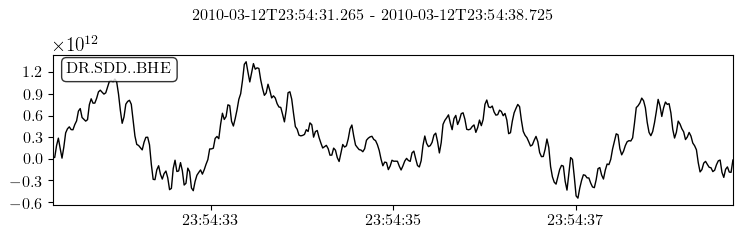

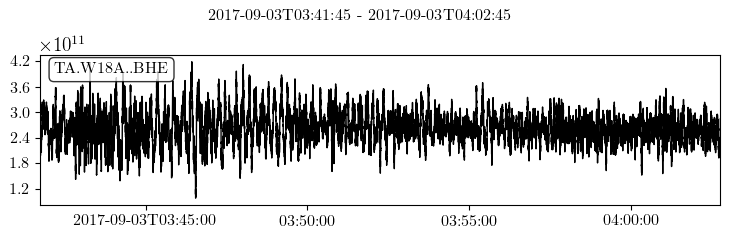

In [48]:
eq.plot(title='Earthquake occured in Mynmer-India border in 2005, recorded in USA')
ex.plot(title='Nuclear explosions occured in North korea in 2017, recorded in USA')

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


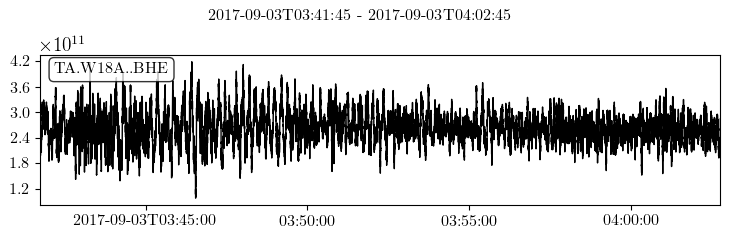

In [34]:
ex.plot()

## Get the statioins and theior location

In [49]:
eqsta = []
exsta = []
for i in range(len(earthquakes)):
    eqsta.append(earthquakes[i].stats['sac']['kstnm'])

for i in range(len(explosions)):
    exsta.append(explosions[i].stats['sac']['kstnm'])
    
stations = np.unique(eqsta + exsta)

In [50]:
station_info = []
for sta in stations:
    seq = earthquakes.select(station=str(sta))
    
    if (seq):  
        info  = {'station': sta, 'lat':seq[0].stats['sac']['stla'], 'long': seq[0].stats['sac']['stlo']}
        station_info.append(info)
    else:
        
        sex = explosions.select(station=str(sta))
        info  = {'station': sta, 'lat':sex[0].stats['sac']['stla'], 'long': sex[0].stats['sac']['stlo']}
        station_info.append(info)

In [70]:
print(station_info[0:10])

[{'station': '034A', 'lat': 27.064699, 'long': -98.683296}, {'station': '035A', 'lat': 26.937901, 'long': -98.102303}, {'station': '035Z', 'lat': 26.462999, 'long': -98.068298}, {'station': '058A', 'lat': 27.0569, 'long': -81.804901}, {'station': '059A', 'lat': 26.9671, 'long': -81.143997}, {'station': '059Z', 'lat': 26.337299, 'long': -81.443199}, {'station': '060A', 'lat': 27.0361, 'long': -80.361801}, {'station': '060Z', 'lat': 26.4062, 'long': -80.556}, {'station': '061Z', 'lat': 25.8657, 'long': -80.906998}, {'station': '062Z', 'lat': 24.726601, 'long': -81.052299}]


In [53]:
import pickle
output = open('station_info.pkl', 'wb')
pickle.dump(station_info, output)
output.close()

## Event Info

In [57]:
from mpl_toolkits.basemap import Basemap
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Equidistant Cylindrical Projection")
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [14]:
# SACPZ.US.OXF.--.BHZ
paz_file = 'SACPZ.'+ tr.stats['sac']['knetwk']+'.'+ tr.stats['sac']['kstnm'] + '.--.'+ tr.stats['sac']['kcmpnm']
root_path = './seismogram_v2/earthquakes/2004-12-26-mw90-sumatra/'
path_name = str(root_path + paz_file)
attach_paz(tr, path_name)
tr.stats

         network: CI
         station: MLAC
        location: 
         channel: BHZ
       starttime: 2004-12-26T01:13:38.013800Z
         endtime: 2004-12-26T01:34:37.963800Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 25200
           calib: 6.21403e+08
         _format: SAC
             paz: AttribDict({'seismometer_gain': 1.0, 'digitizer_gain': 1.0, 'poles': [(-0.0123+0.0123j), (-0.0123-0.0123j), (-502+188j), (-502-188j)], 'zeros': [0j, 0j, 0j, (1000+0j)], 'sensitivity': 1.0, 'gain': 178580700000.0})
             sac: AttribDict({'delta': 0.050000001, 'scale': 6.2140301e+08, 'b': 0.00079999998, 'e': 1259.9508, 'o': -886.01379, 'stla': 37.630192, 'stlo': -118.83605, 'stel': 2162.0, 'stdp': 0.0, 'evla': 3.4124999, 'evlo': 95.901199, 'evdp': 26.1, 'dist': 14229.828, 'az': 35.024719, 'baz': 313.81171, 'gcarc': 127.97759, 'cmpaz': 0.0, 'cmpinc': 0.0, 'nzyear': 2004, 'nzjday': 361, 'nzhour': 1, 'nzmin': 13, 'nzsec': 38, 'nzmsec': 13, 'nvhdr': 6, 'npts': 25200, 'iftyp

In [21]:
station_name = 'MLAC'
steq = earthquakes.select(station= station_name)
stex = explosions.select(station= station_name)

print(stex[0].stats)

plt.figure(figsize=(10,3))

plt.subplot(121)
plt.plot(steq[0].data)
plt.xlabel('Number of data points')
plt.ylabel('Counts')
plt.title('Eartqauke')

plt.subplot(122)
plt.plot(stex[0].data)
plt.xlabel('Number of data points')
plt.title('Explosion')
plt.tight_layout()
plt.savefig('raw_seismograms.png')
plt.show()

         network: CI
         station: MLAC
        location: 
         channel: BHE
       starttime: 1998-05-11T10:27:33.015501Z
         endtime: 1998-05-11T10:48:32.965501Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 25200
           calib: 6.41991e+08
         _format: SAC
             sac: AttribDict({'delta': 0.050000001, 'scale': 6.4199098e+08, 'b': 0.00050099997, 'e': 1259.9506, 'o': -831.0155, 'stla': 37.630192, 'stlo': -118.83605, 'stel': 2162.0, 'stdp': 0.0, 'evla': 27.0812, 'evlo': 71.759399, 'evdp': 0.0, 'dist': 12771.913, 'az': 9.2592278, 'baz': 349.58997, 'gcarc': 114.86566, 'cmpaz': 90.0, 'cmpinc': 90.0, 'nzyear': 1998, 'nzjday': 131, 'nzhour': 10, 'nzmin': 27, 'nzsec': 33, 'nzmsec': 15, 'nvhdr': 6, 'npts': 25200, 'iftype': 1, 'leven': 1, 'kstnm': 'MLAC', 'kevnm': 'India-Pakistan B', 'kcmpnm': 'BHE', 'knetwk': 'CI', 'kinst': 'STS-2,ST'})


In [5]:
print(explosions[0].stats)

         network: 1F
         station: SAB1
        location: 
         channel: BHE
       starttime: 2016-01-06T01:43:43.000000Z
         endtime: 2016-01-06T02:04:43.000000Z
   sampling_rate: 50.0
           delta: 0.02
            npts: 63001
           calib: 1.20135e+09
         _format: SAC
             sac: AttribDict({'delta': 0.02, 'scale': 1.20135e+09, 'b': 0.0, 'e': 1260.0, 'o': -822.0, 'stla': 14.7484, 'stlo': -91.578796, 'stel': 2288.0, 'stdp': 0.0, 'evla': 41.299599, 'evlo': 129.04671, 'evdp': 0.0, 'dist': 12538.181, 'az': 43.089725, 'baz': 327.85742, 'gcarc': 112.76357, 'cmpaz': 90.0, 'cmpinc': 90.0, 'nzyear': 2016, 'nzjday': 6, 'nzhour': 1, 'nzmin': 43, 'nzsec': 43, 'nzmsec': 0, 'nvhdr': 6, 'npts': 63001, 'iftype': 1, 'leven': 1, 'kstnm': 'SAB1', 'kevnm': 'North Korea', 'kcmpnm': 'BHE', 'knetwk': '1F', 'kinst': 'Nanometr'})


In [6]:
stations = []
for i in range(len(st)):
    stations.append(st[i].stats['sac']['kstnm'])
stations = np.unique(stations)

In [7]:
broads = []
for i in stations:
    ncomp = len(st.select(station=i))
    if ncomp == 3:
        broads.append(i)
#         print('Station: {} and no of comp: {}'.format(i, ncomp))

### show processed seismograms

In [13]:
%matplotlib tk
def plot_seismograms(st):
    
    plt.figure(figsize=(6, 4))
    for i in range(len(st)):
        if (st[i].stats['sac']['kcmpnm'] == 'BHZ'):
            plt.subplot(311)
            plt.plot(signal.detrend(st[i].data), 'b-')
            plt.title('Vertical component')
            plt.xticks([])

        elif (st[i].stats['sac']['kcmpnm'] == 'BHE'):
            plt.subplot(312)
            plt.plot(signal.detrend(st[i].data), 'r-')
            plt.title('East-west component')
            plt.xticks([])

        elif (st[i].stats['sac']['kcmpnm'] == 'BHN'):
            plt.subplot(313)
            plt.plot(signal.detrend(st[i].data), 'k-')
            plt.title('North-south component')
            plt.xlabel('Number of data points')
    
    plt.tight_layout()
    plt.show()

In [19]:
plot_seismograms(earthquakes[0:200])

In [18]:
plot_seismograms(explosions[0:200])

In [91]:
import librosa
import scipy as sp
import scipy.signal as signal
aa = librosa.feature.rmse(y=ss[0].data)

In [95]:
ss = st.select(station=broads[100])
data = ss[0].data
sample_rate = ss[0].stats.sampling_rate
f, Pxx_den = signal.periodogram(data, sample_rate)

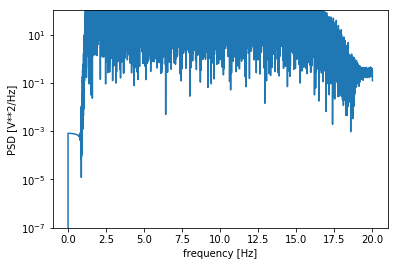

In [96]:
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [99]:
np.sqrt(Pxx_den.max())

50.532509295753336

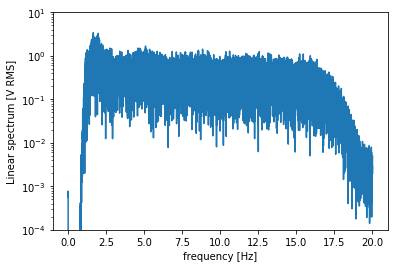

In [100]:
f, Pxx_spec = signal.periodogram(data, sample_rate, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.ylim([1e-4, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()


In [101]:
np.sqrt(Pxx_spec.max())

3.4125940076090702